# Preprocessing

### Import Statements

In [1]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
from nltk.tokenize import RegexpTokenizer
import re 
import os
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
stem = PorterStemmer()
tokinizer = RegexpTokenizer(r'\w+')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Methods

In [2]:
def tokenise(df,col):
    df['Tokenize Text'] = df[col].apply(lambda x : tokinizer.tokenize(x.lower()))
    return df

def select_business(df,business_id):
    business_reviews = df[df["business_id"] == business_id].sum()['Stemmed']
    return business_reviews

def plot_freq(words,title):
    # Frequency Distribution Plot
    freqdist = FreqDist(words)
    plt.rcParams['figure.figsize'] = [30, 10]
    axes = plt.gca()
    axes.xaxis.label.set_size(20)
    axes.yaxis.label.set_size(20)
    axes.tick_params(labelsize=20)
    freqdist.plot(20,title = title, cumulative = False)
    plt.show()

def remove_stopwords(df,col):
    filtered_sent=[]
    for i in tqdm(range(len(df))):
        indv = []
        indv.append([w for w in df[col][i] if not w in stop_words])    
        filtered_sent.append(indv[0])
    df['No-Stopwords'] = filtered_sent
    return df

def stemmer(df,col):
    stemmed_rev = []
    for i in tqdm(range(len(df))):
        indv = []
        for j in df[col][i]:
          indv.append(stem.stem(j))
        stemmed_rev.append(indv)
    df['Stemmed'] = stemmed_rev
    return df

## Initialise Preprocessing

#### Reading and Tokenising

In [3]:
# Read from csv
rev_df = pd.read_csv('../Data/review.csv')
rev_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [4]:
# Tokenise the reviews
tok_df = tokenise(rev_df,'text')
tok_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Tokenize Text
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25,"[we, had, my, mother, s, birthday, party, here..."
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43,"[good, korean, grill, near, eaton, centre, the..."
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15,"[was, recommended, to, try, this, place, by, f..."
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26,"[ambience, would, not, expect, something, this..."
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11,"[absolutely, the, worst, pool, company, that, ..."


#### Removal of Stopwords and Stemming

In [5]:
# Removal of Stopwords
rem_stop = remove_stopwords(tok_df, 'Tokenize Text')
rem_stop.head()

100%|█████████████████████████████████████████████████████████████████████████| 15300/15300 [00:00<00:00, 16062.99it/s]


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Tokenize Text,No-Stopwords
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25,"[we, had, my, mother, s, birthday, party, here...","[mother, birthday, party, 10, 29, 16, great, t..."
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43,"[good, korean, grill, near, eaton, centre, the...","[good, korean, grill, near, eaton, centre, mar..."
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15,"[was, recommended, to, try, this, place, by, f...","[recommended, try, place, people, today, first..."
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26,"[ambience, would, not, expect, something, this...","[ambience, would, expect, something, nice, can..."
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11,"[absolutely, the, worst, pool, company, that, ...","[absolutely, worst, pool, company, ever, deal,..."


In [6]:
# Stemming the database
stemmed = stemmer(rem_stop,'No-Stopwords')
stemmed.head()

100%|███████████████████████████████████████████████████████████████████████████| 15300/15300 [01:01<00:00, 248.65it/s]


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Tokenize Text,No-Stopwords,Stemmed
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25,"[we, had, my, mother, s, birthday, party, here...","[mother, birthday, party, 10, 29, 16, great, t...","[mother, birthday, parti, 10, 29, 16, great, t..."
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43,"[good, korean, grill, near, eaton, centre, the...","[good, korean, grill, near, eaton, centre, mar...","[good, korean, grill, near, eaton, centr, mari..."
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15,"[was, recommended, to, try, this, place, by, f...","[recommended, try, place, people, today, first...","[recommend, tri, place, peopl, today, first, t..."
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26,"[ambience, would, not, expect, something, this...","[ambience, would, expect, something, nice, can...","[ambienc, would, expect, someth, nice, canneri..."
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11,"[absolutely, the, worst, pool, company, that, ...","[absolutely, worst, pool, company, ever, deal,...","[absolut, worst, pool, compani, ever, deal, cu..."


#### Random Business 1

In [7]:
# Business1
business_id1 = 'ZBE-H_aUlicix_9vUGQPIQ'

##### Frequency Distribution before Stemming

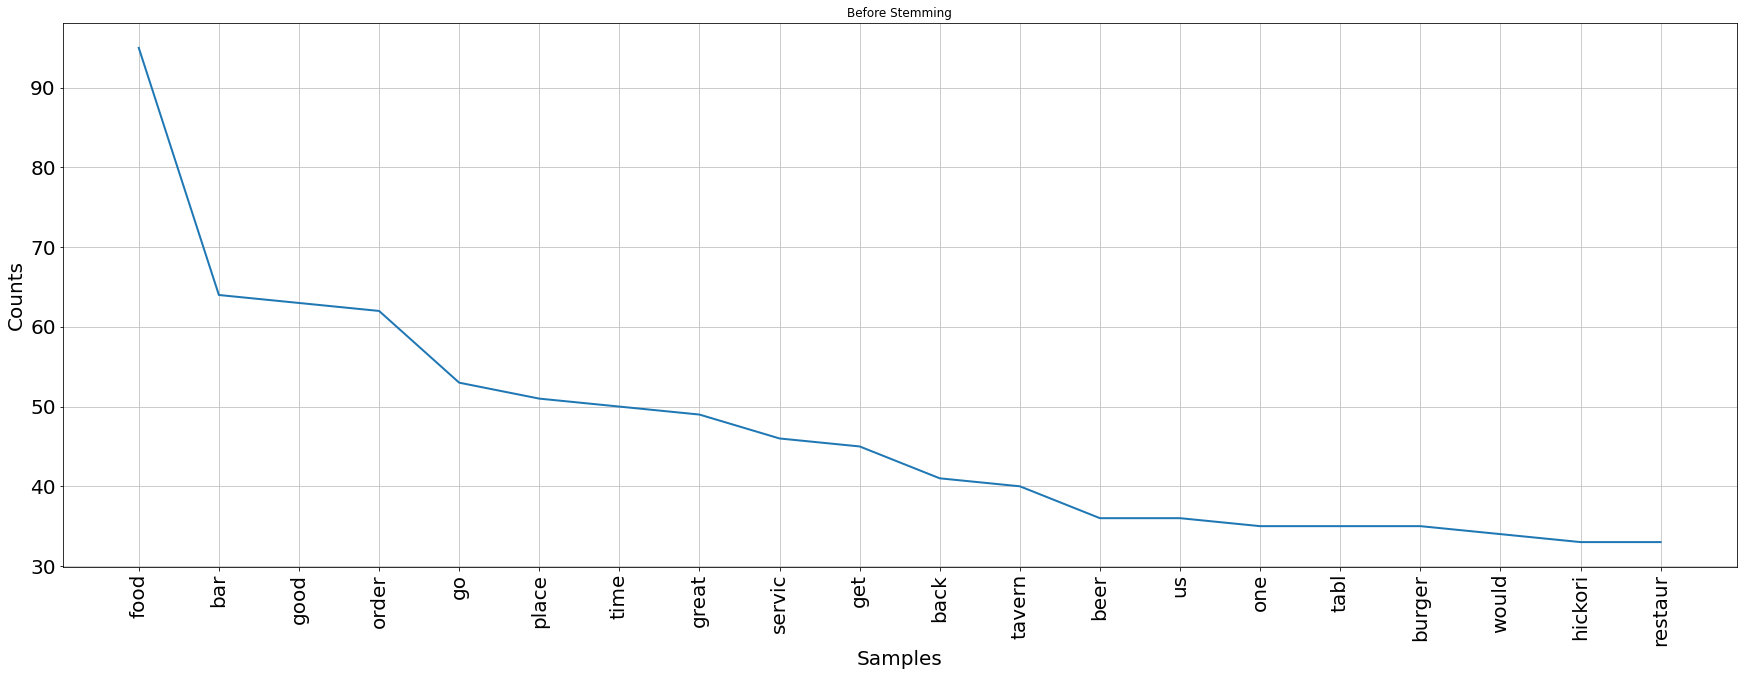

In [8]:
# Frequency Distribution before Stemming
business_reviews1 = select_business(rem_stop,business_id1)
plot_freq(business_reviews1,"Before Stemming")

##### Frequency Distribution after Stemming

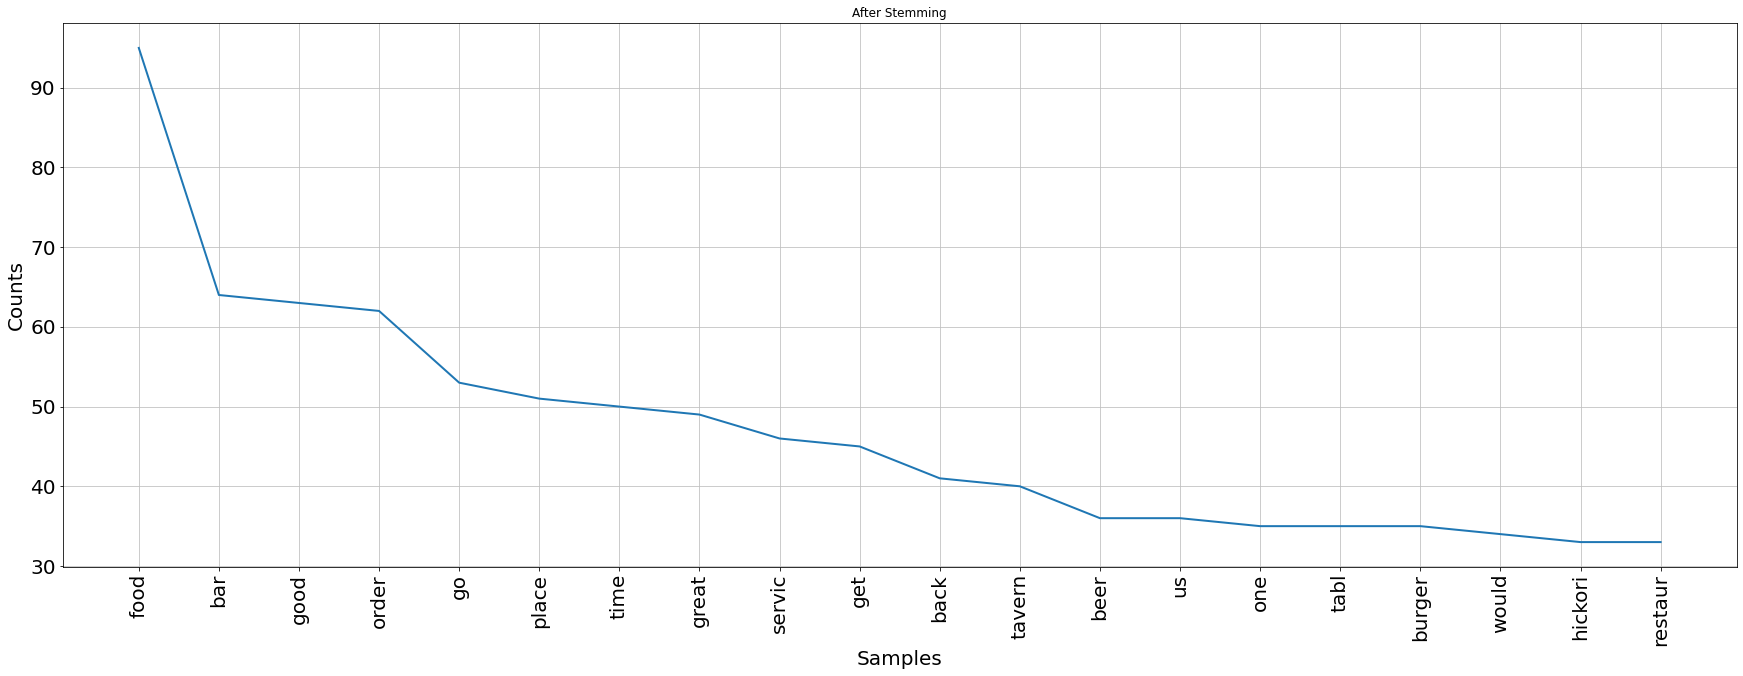

In [9]:
# Frequency Distribution after Stemming
business_reviews1_stemmed = select_business(rem_stop,business_id1)
plot_freq(business_reviews1_stemmed,"After Stemming")

#### Random Business 2

In [10]:
# Business2
business_id2 = '7e3PZzUpG5FYOTGt3O3ePA'

##### Frequency Distribution before Stemming

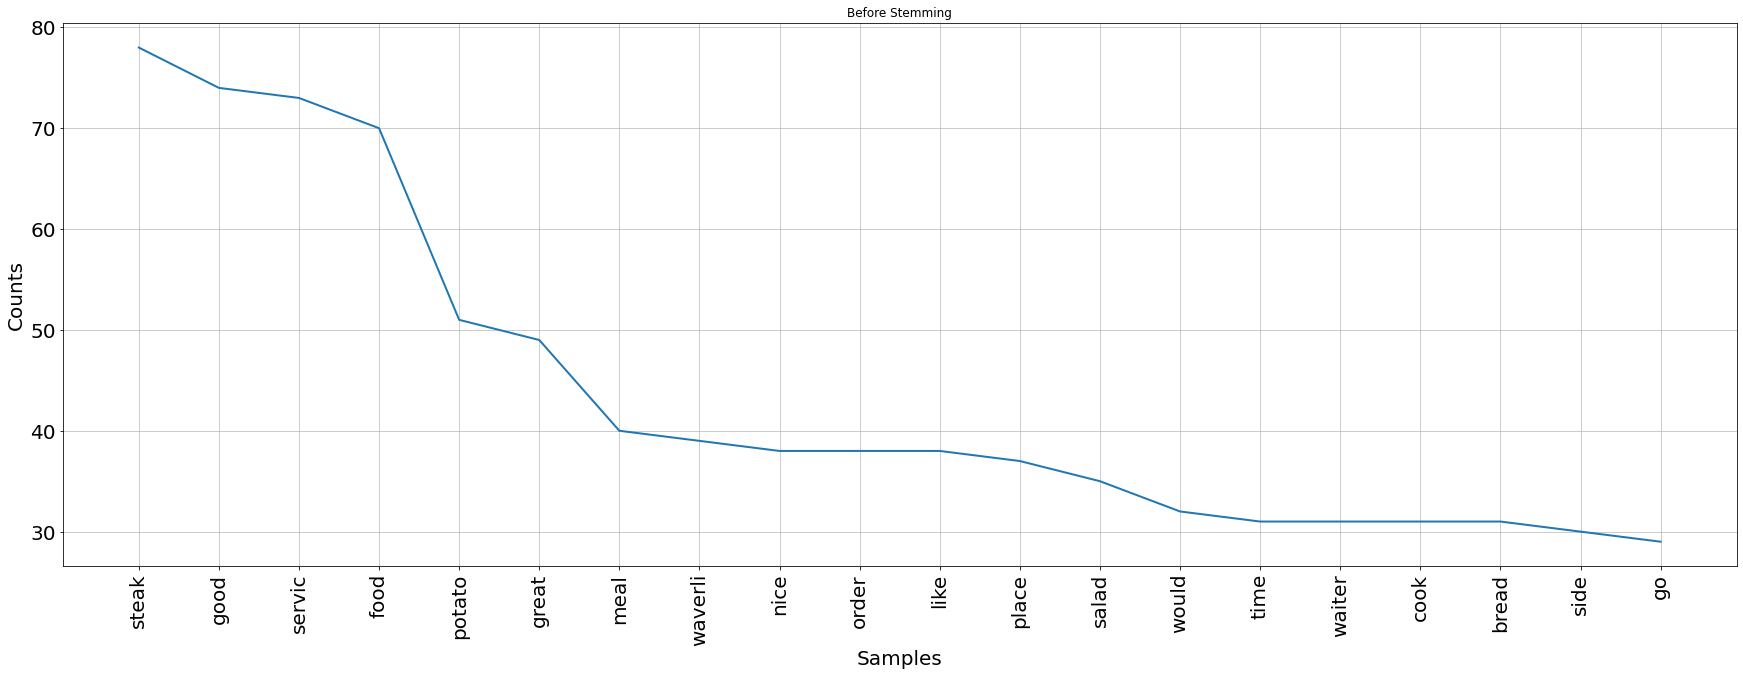

In [11]:
# Frequency Distribution before Stemming
business_reviews2 = select_business(rem_stop,business_id2)
plot_freq(business_reviews2,"Before Stemming")

##### Frequency Distribution after Stemming

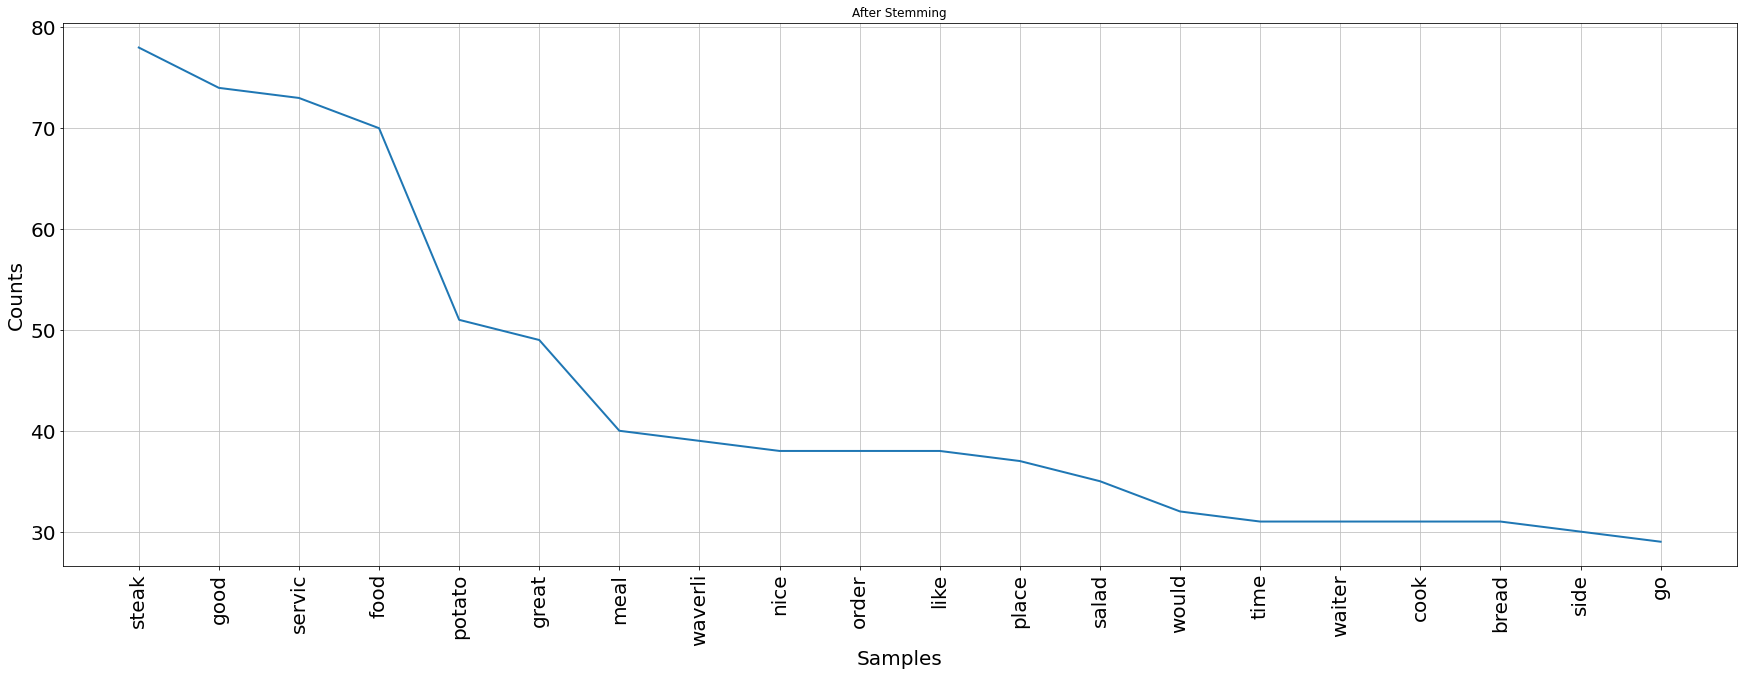

In [12]:
# Frequency Distribution after Stemming
business_reviews2_stemmed = select_business(rem_stop,business_id2)
plot_freq(business_reviews2_stemmed,"After Stemming")